# MNIST dataset: Clasificación

Es un dataset utilizado comúnmente en *machine learning* para comparar el rendimiento de diferentes técnicas de clasificación. Consta de 70.000 imágenes de 28x28 píxeles en escala de grises que representan los números entre 0 y 9 escritos a mano.

Existen dos formas de abordar este problema dependiendo de si se consideran las etiquetas que indican el valor numérico del número dibujado a mano. En caso de considerar esta etiqueta se trabaja de forma supervisada, si no, es un trabajo no supervisado o de clustering. En general, los rendimientos obtenidos por los enfoques no supervisados son menores.

#### Propuesta

Predecir a partir de la imagen de un dígito escrito a mano, el valor del dígito representado.

### Importar datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = pd.DataFrame(X)
y = pd.DataFrame(y, columns=["label"]).astype('int32')

In [3]:
print("Cantidad de instancias: ", X.shape[0])
print("Cantidad de features: ", X.shape[1],"= (28*28)")
print("Cantidad de clases: ", len(set(y["label"])))

Cantidad de instancias:  70000
Cantidad de features:  784 = (28*28)
Cantidad de clases:  10


Clase:  [5]


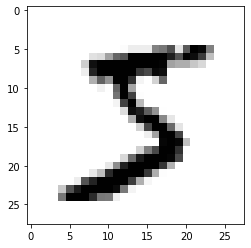

Clase:  [0]


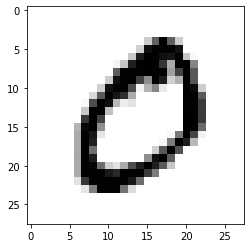

Clase:  [4]


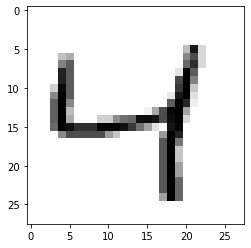

Clase:  [1]


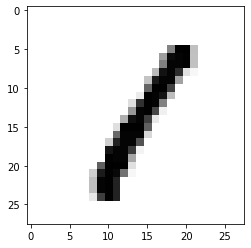

Clase:  [9]


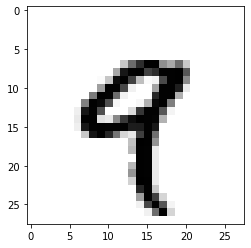

Clase:  [2]


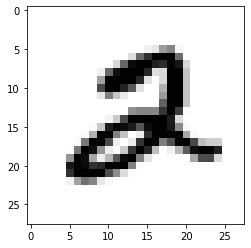

Clase:  [1]


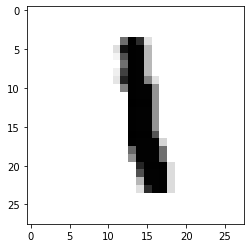

Clase:  [3]


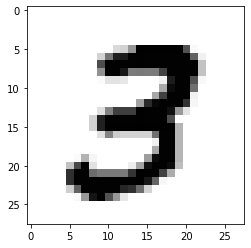

Clase:  [1]


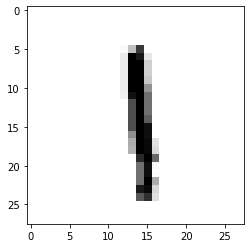

Clase:  [4]


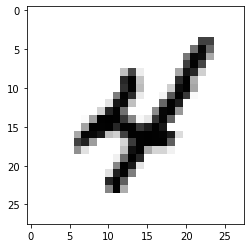

In [4]:
# Graficando algunos ejemplos
for i in range(10):
    print("Clase: ", y.loc[i].values)
    plt.imshow(X.loc[i].values.reshape(28,28), cmap="gray_r")
    plt.show()

In [5]:
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
y.isnull().describe()

,label
count,70000
unique,1
top,False
freq,70000


### Análisis Descriptivo

In [7]:
y.describe()

,label
count,70000.000000
mean,4.452429
std,2.890195
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [8]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


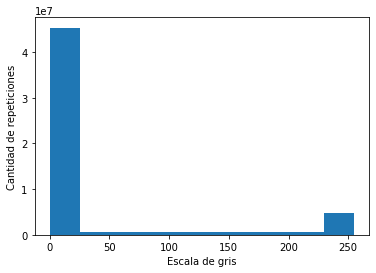

In [9]:
#¿Cómo se distribuyen los colores (blanco y negro) de los píxeles?
plt.hist(X.values.flatten())
plt.xlabel("Escala de gris")
plt.ylabel("Cantidad de repeticiones")
plt.show()

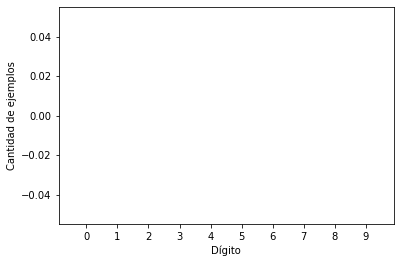

Counter({1: 7877, 7: 7293, 3: 7141, 2: 6990, 9: 6958, 0: 6903, 6: 6876, 8: 6825, 4: 6824, 5: 6313})


In [10]:
# ¿Cuántos datos de cada dígito hay en el dataset?
from collections import Counter
n_per_class = Counter(y["label"].values)
plt.bar(range(10), [n_per_class[str(i)] for i in range(10)], align='center')
plt.xticks(range(10), range(10))
plt.xlabel("Dígito")
plt.ylabel("Cantidad de ejemplos")
plt.show()
print(n_per_class)

### Preparación de los datos

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# División en datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
# Se escalan los valores de las variables para que tomen valores entre 0 y 1
X_train = X_train / 255.0
X_test = X_test / 255.0

### Entrenamiento de modelos

In [14]:
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.svm import SVC

param_grid = {'C': [1],#, 10, 100, 1000],  
              'gamma': ['auto']#, 0.1], 0.01, 0.001, 0.0001], 
             }

sv_clf = SVC(random_state=42)
grid_sv = GridSearchCV(sv_clf,
                      param_grid,
                      cv=3,
                      scoring='neg_mean_squared_error',
                      verbose=1,
                      n_jobs=-1)
grid_sv.fit(X_train, y_train)

print("Best score (MSE): ", grid_sv.best_score_)
print("Best params: ", grid_sv.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 11.6min finished
C:\Users\strx\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best score (MSE):  -1.0575396825396826
Best params:  {'C': 1, 'gamma': 'auto'}


In [15]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [4, 8, 16]}

kn_clf = KNeighborsClassifier(n_jobs=-1)
grid_kn = GridSearchCV(kn_clf,
                      param_grid,
                      cv=3,
                      scoring='neg_mean_squared_error',
                      verbose=2)
grid_kn.fit(X_train, y_train)

print("Best score (MSE): ", grid_kn.best_score_)
print("Best params: ", grid_kn.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_neighbors=4 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... n_neighbors=4, total= 3.6min
[CV] n_neighbors=4 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.6min remaining:    0.0s
C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... n_neighbors=4, total= 3.6min
[CV] n_neighbors=4 ...................................................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... n_neighbors=4, total= 3.6min
[CV] n_neighbors=8 ...................................................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... n_neighbors=8, total= 3.6min
[CV] n_neighbors=8 ...................................................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... n_neighbors=8, total= 3.6min
[CV] n_neighbors=8 ...................................................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... n_neighbors=8, total= 3.7min
[CV] n_neighbors=16 ..................................................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................................... n_neighbors=16, total= 3.7min
[CV] n_neighbors=16 ..................................................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................................... n_neighbors=16, total= 3.6min
[CV] n_neighbors=16 ..................................................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................................... n_neighbors=16, total= 3.6min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 32.6min finished
C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best score (MSE):  -0.5738095238095239
Best params:  {'n_neighbors': 4}


In [16]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100, 200],
              'max_features': [50, 100]
             }

rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_rf = GridSearchCV(rf_clf,
                      param_grid,
                      cv=3,
                      scoring='neg_mean_squared_error',
                      verbose=2)
grid_rf.fit(X_train, y_train)

print("Best score (MSE): ", grid_rf.best_score_)
print("Best params: ", grid_rf.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_features=50, n_estimators=100 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................ max_features=50, n_estimators=100, total=   8.0s
[CV] max_features=50, n_estimators=100 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s
C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................ max_features=50, n_estimators=100, total=   7.8s
[CV] max_features=50, n_estimators=100 ...............................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................ max_features=50, n_estimators=100, total=   7.8s
[CV] max_features=50, n_estimators=200 ...............................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................ max_features=50, n_estimators=200, total=  14.9s
[CV] max_features=50, n_estimators=200 ...............................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................ max_features=50, n_estimators=200, total=  14.7s
[CV] max_features=50, n_estimators=200 ...............................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................ max_features=50, n_estimators=200, total=  14.8s
[CV] max_features=100, n_estimators=100 ..............................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ............... max_features=100, n_estimators=100, total=  13.8s
[CV] max_features=100, n_estimators=100 ..............................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ............... max_features=100, n_estimators=100, total=  13.8s
[CV] max_features=100, n_estimators=100 ..............................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ............... max_features=100, n_estimators=100, total=  14.1s
[CV] max_features=100, n_estimators=200 ..............................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ............... max_features=100, n_estimators=200, total=  27.2s
[CV] max_features=100, n_estimators=200 ..............................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ............... max_features=100, n_estimators=200, total=  27.8s
[CV] max_features=100, n_estimators=200 ..............................


C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ............... max_features=100, n_estimators=200, total=  26.9s


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  3.2min finished
C:\Users\strx\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best score (MSE):  -0.5863333333333333
Best params:  {'max_features': 50, 'n_estimators': 200}


In [20]:
from sklearn.neural_network import MLPClassifier

param_grid = {'hidden_layer_sizes': [100, 200],
              #'solver': ['sgd', 'adam'],
              #'learning_rate_init':[0.0001, 0.001]
             }

nn_clf = MLPClassifier(random_state=42, verbose=True)
grid_nn = GridSearchCV(nn_clf,
                      param_grid,
                      cv=3,
                      scoring='neg_mean_squared_error',
                      verbose=1)
grid_nn.fit(X_train, y_train)

print("Best score (MSE): ", grid_nn.best_score_)
print("Best params: ", grid_nn.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\strx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.51722967
Iteration 2, loss = 0.24168599
Iteration 3, loss = 0.18826531
Iteration 4, loss = 0.15438057
Iteration 5, loss = 0.12959333
Iteration 6, loss = 0.11138244
Iteration 7, loss = 0.09618589
Iteration 8, loss = 0.08323289
Iteration 9, loss = 0.07343302
Iteration 10, loss = 0.06485280
Iteration 11, loss = 0.05780086
Iteration 12, loss = 0.05084254
Iteration 13, loss = 0.04601058
Iteration 14, loss = 0.04068969
Iteration 15, loss = 0.03645256
Iteration 16, loss = 0.03288506
Iteration 17, loss = 0.02973381
Iteration 18, loss = 0.02602861
Iteration 19, loss = 0.02351589
Iteration 20, loss = 0.02088470
Iteration 21, loss = 0.01891582
Iteration 22, loss = 0.01684958
Iteration 23, loss = 0.01481403
Iteration 24, loss = 0.01339530
Iteration 25, loss = 0.01219856
Iteration 26, loss = 0.01074971
Iteration 27, loss = 0.01045175
Iteration 28, loss = 0.00858729
Iteration 29, loss = 0.00748609
Iteration 30, loss = 0.00674543
Iteration 31, loss = 0.00606600
Iteration 32, los

C:\Users\strx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.51945585
Iteration 2, loss = 0.24427714
Iteration 3, loss = 0.18944473
Iteration 4, loss = 0.15335381
Iteration 5, loss = 0.12912232
Iteration 6, loss = 0.11031687
Iteration 7, loss = 0.09509774
Iteration 8, loss = 0.08372325
Iteration 9, loss = 0.07304024
Iteration 10, loss = 0.06479873
Iteration 11, loss = 0.05834054
Iteration 12, loss = 0.05150403
Iteration 13, loss = 0.04592994
Iteration 14, loss = 0.04064610
Iteration 15, loss = 0.03695126
Iteration 16, loss = 0.03278936
Iteration 17, loss = 0.02924430
Iteration 18, loss = 0.02609419
Iteration 19, loss = 0.02371240
Iteration 20, loss = 0.02095013
Iteration 21, loss = 0.01863463
Iteration 22, loss = 0.01707902
Iteration 23, loss = 0.01536486
Iteration 24, loss = 0.01380000
Iteration 25, loss = 0.01231925
Iteration 26, loss = 0.01067742
Iteration 27, loss = 0.00966566
Iteration 28, loss = 0.00867072
Iteration 29, loss = 0.00767731
Iteration 30, loss = 0.00699905
Iteration 31, loss = 0.00600415
Iteration 32, los

C:\Users\strx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.51289638
Iteration 2, loss = 0.24220855
Iteration 3, loss = 0.18601512
Iteration 4, loss = 0.15290216
Iteration 5, loss = 0.12879948
Iteration 6, loss = 0.10936675
Iteration 7, loss = 0.09489309
Iteration 8, loss = 0.08300190
Iteration 9, loss = 0.07234080
Iteration 10, loss = 0.06462653
Iteration 11, loss = 0.05690449
Iteration 12, loss = 0.05059980
Iteration 13, loss = 0.04489394
Iteration 14, loss = 0.03934863
Iteration 15, loss = 0.03548349
Iteration 16, loss = 0.03169393
Iteration 17, loss = 0.02790061
Iteration 18, loss = 0.02499580
Iteration 19, loss = 0.02209756
Iteration 20, loss = 0.02004544
Iteration 21, loss = 0.01712924
Iteration 22, loss = 0.01566365
Iteration 23, loss = 0.01407647
Iteration 24, loss = 0.01236357
Iteration 25, loss = 0.01134746
Iteration 26, loss = 0.01035466
Iteration 27, loss = 0.00860547
Iteration 28, loss = 0.00753891
Iteration 29, loss = 0.00722251
Iteration 30, loss = 0.00632098
Iteration 31, loss = 0.00554132
Iteration 32, los

C:\Users\strx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.43707196
Iteration 2, loss = 0.19467539
Iteration 3, loss = 0.14016622
Iteration 4, loss = 0.10839627
Iteration 5, loss = 0.08863405
Iteration 6, loss = 0.07176501
Iteration 7, loss = 0.05971759
Iteration 8, loss = 0.04967607
Iteration 9, loss = 0.04187896
Iteration 10, loss = 0.03597116
Iteration 11, loss = 0.02995607
Iteration 12, loss = 0.02549232
Iteration 13, loss = 0.02220169
Iteration 14, loss = 0.01889905
Iteration 15, loss = 0.01587609
Iteration 16, loss = 0.01382553
Iteration 17, loss = 0.01131841
Iteration 18, loss = 0.01017637
Iteration 19, loss = 0.00826222
Iteration 20, loss = 0.00730261
Iteration 21, loss = 0.00617404
Iteration 22, loss = 0.00497716
Iteration 23, loss = 0.00413701
Iteration 24, loss = 0.00377135
Iteration 25, loss = 0.00359548
Iteration 26, loss = 0.00290906
Iteration 27, loss = 0.00245828
Iteration 28, loss = 0.00227404
Iteration 29, loss = 0.00202623
Iteration 30, loss = 0.00183421
Iteration 31, loss = 0.00165186
Iteration 32, los

C:\Users\strx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.43734526
Iteration 2, loss = 0.19681182
Iteration 3, loss = 0.14236879
Iteration 4, loss = 0.11070871
Iteration 5, loss = 0.08860961
Iteration 6, loss = 0.07119961
Iteration 7, loss = 0.05979305
Iteration 8, loss = 0.05003493
Iteration 9, loss = 0.04197005
Iteration 10, loss = 0.03543289
Iteration 11, loss = 0.02949242
Iteration 12, loss = 0.02509918
Iteration 13, loss = 0.02102886
Iteration 14, loss = 0.01883082
Iteration 15, loss = 0.01549113
Iteration 16, loss = 0.01325805
Iteration 17, loss = 0.01159941
Iteration 18, loss = 0.00996097
Iteration 19, loss = 0.00798843
Iteration 20, loss = 0.00685396
Iteration 21, loss = 0.00611739
Iteration 22, loss = 0.00513684
Iteration 23, loss = 0.00478118
Iteration 24, loss = 0.00379706
Iteration 25, loss = 0.00344078
Iteration 26, loss = 0.00399358
Iteration 27, loss = 0.00334179
Iteration 28, loss = 0.00249925
Iteration 29, loss = 0.00198853
Iteration 30, loss = 0.00177929
Iteration 31, loss = 0.00162828
Iteration 32, los

C:\Users\strx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.43066466
Iteration 2, loss = 0.19318120
Iteration 3, loss = 0.14037315
Iteration 4, loss = 0.10903941
Iteration 5, loss = 0.08644149
Iteration 6, loss = 0.07063685
Iteration 7, loss = 0.05815957
Iteration 8, loss = 0.04877124
Iteration 9, loss = 0.04152194
Iteration 10, loss = 0.03548266
Iteration 11, loss = 0.02902564
Iteration 12, loss = 0.02439855
Iteration 13, loss = 0.02125222
Iteration 14, loss = 0.01788289
Iteration 15, loss = 0.01543686
Iteration 16, loss = 0.01244879
Iteration 17, loss = 0.01102687
Iteration 18, loss = 0.00937640
Iteration 19, loss = 0.00790109
Iteration 20, loss = 0.00715440
Iteration 21, loss = 0.00572755
Iteration 22, loss = 0.00478862
Iteration 23, loss = 0.00453199
Iteration 24, loss = 0.00361984
Iteration 25, loss = 0.00323345
Iteration 26, loss = 0.00324197
Iteration 27, loss = 0.00344997
Iteration 28, loss = 0.00249364
Iteration 29, loss = 0.00187308
Iteration 30, loss = 0.00171692
Iteration 31, loss = 0.00194675
Iteration 32, los

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.3min finished
C:\Users\strx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.36162366
Iteration 2, loss = 0.15789771
Iteration 3, loss = 0.11141442
Iteration 4, loss = 0.08476702
Iteration 5, loss = 0.06856640
Iteration 6, loss = 0.05572698
Iteration 7, loss = 0.04640854
Iteration 8, loss = 0.03878878
Iteration 9, loss = 0.03255777
Iteration 10, loss = 0.02705185
Iteration 11, loss = 0.02339185
Iteration 12, loss = 0.01888520
Iteration 13, loss = 0.01570593
Iteration 14, loss = 0.01332796
Iteration 15, loss = 0.01162048
Iteration 16, loss = 0.01011491
Iteration 17, loss = 0.00801380
Iteration 18, loss = 0.00670633
Iteration 19, loss = 0.00579169
Iteration 20, loss = 0.00472376
Iteration 21, loss = 0.00420659
Iteration 22, loss = 0.00422781
Iteration 23, loss = 0.00777323
Iteration 24, loss = 0.00433143
Iteration 25, loss = 0.00230025
Iteration 26, loss = 0.00176366
Iteration 27, loss = 0.00151969
Iteration 28, loss = 0.00155297
Iteration 29, loss = 0.00666185
Iteration 30, loss = 0.00878882
Iteration 31, loss = 0.00275403
Iteration 32, los

### Evaluación de los modelos

In [24]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [26]:
models = [grid_sv, grid_kn, grid_rf, grid_nn]
model_name = ['SVM', 'KNN', 'RF', 'NN']

In [28]:
scores = []
for i, model in enumerate(models):
    print(model_name[i])
    score = {}
    score["Nombre"] = model_name[i]
    pred = model.predict(X_test)
    score["Precision"] = precision_score(y_test, pred, average='macro')
    score["Recall"] = recall_score(y_test, pred, average='macro')
    score["F1"] = f1_score(y_test, pred, average='macro')
    scores.append(score)

SVM
KNN
RF
NN


In [29]:
pd.DataFrame(scores)

,Nombre,Precision,Recall,F1
0,SVM,0.939161,0.939403,0.939093
1,KNN,0.970841,0.969571,0.970006
2,RF,0.967827,0.968159,0.967942
3,NN,0.978515,0.978599,0.978505


In [30]:
pred = grid_nn.predict(X_test)

In [33]:
conf_matrix = confusion_matrix(y_test, pred)

nn_row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / nn_row_sums

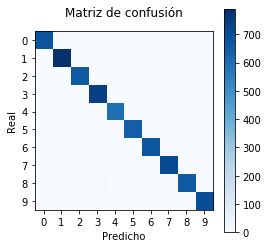

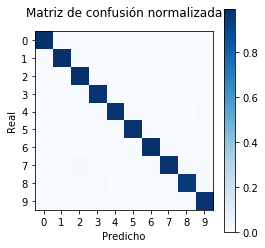

In [51]:
plt.matshow(conf_matrix, cmap="Blues")
plt.grid(False)
plt.title("Matriz de confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.xticks(range(10))
plt.yticks(range(10))
plt.gca().xaxis.tick_bottom()
plt.colorbar()
plt.show()

plt.matshow(norm_conf_matrix, cmap="Blues")
plt.grid(False)
plt.title("Matriz de confusión normalizada")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.xticks(range(10))
plt.yticks(range(10))
plt.gca().xaxis.tick_bottom()
plt.colorbar()
plt.show()

In [41]:
nn_row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / nn_row_sums

In [ ]:
np.fill_diagonal(norm_conf_matrix, 0)

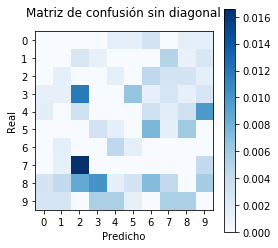

In [53]:
plt.matshow(norm_conf_matrix, cmap="Blues")
plt.grid(False)
plt.title("Matriz de confusión sin diagonal")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.xticks(range(10))
plt.yticks(range(10))
plt.gca().xaxis.tick_bottom()
plt.colorbar()
plt.show()

# Extra: Clustering

Ahora supongamos que sólo tenemos las imágenes de los dígitos escritos a mano y no las etiquetas que nos indican a qué dígito corresponde ¿Podríamos de igual manera clasificar en grupos separados los dígitos que son distintos? Esta es una estrategia no supervisada y para resolver el problema utilizaremos Clustering.

In [56]:
# Tomamos todos los ejemplos que tenemos y lo normalizamos
X = X / 255.0

In [80]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters = 10, max_iter=300, n_init=20) 
kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=300, max_no_improvement=10,
                n_clusters=10, n_init=20, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Ahora buscamos una imagen media de cada grupo definido

In [81]:
digit_mean = [np.zeros(28*28) for i in range(10)]
counter = np.zeros(10)

In [82]:
for digit, image in zip(kmeans.labels_, X.values):
    digit_mean[digit] += image
    counter[digit] += 1

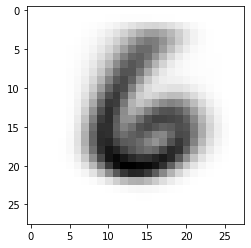

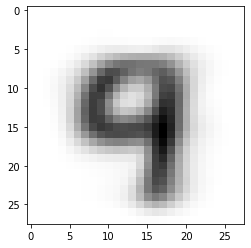

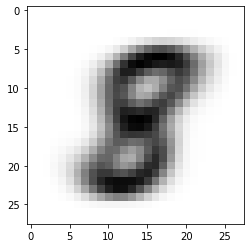

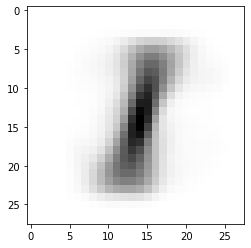

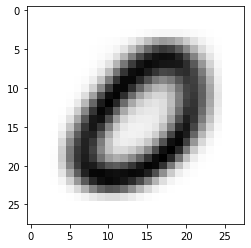

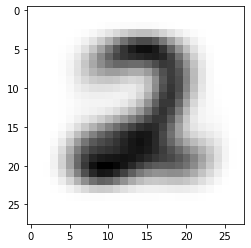

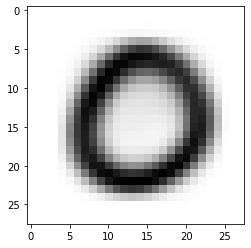

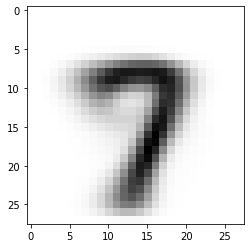

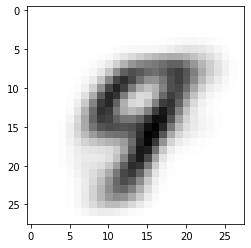

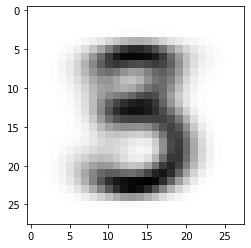

In [83]:
for i in range(10):
    plt.imshow((digit_mean[i] / counter[i]).reshape(28,28), cmap="gray_r")
    plt.show()

Se pueden apreciar claramente los dígitos en cada imagen, sin embargo, también faltan algunos números como el 4 y el 5 que se pueden confundir con el 9 y el 3.